# Визуализация данных "Celebrity Deaths"
## Кодрян М. С., ВМК МГУ ММП, 517 группа

Useful link: https://rstudio-pubs-static.s3.amazonaws.com/245019_317520073bf74163a7ead8786ace2b54.html

### Общий обзор

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
plt.rcParams["patch.force_edgecolor"] = False

In [3]:
my_cp = sns.color_palette("colorblind") * 10

In [4]:
df = pd.read_csv('celebrity_deaths_4.csv', encoding='latin')
df.head()

age  birth_year        cause_of_death death_month  death_year  \
0   85        1921        natural causes     January        2006   
1   49        1957              murdered     January        2006   
2   64        1942   Alzheimer's disease     January        2006   
3   86        1920   Alzheimer's disease     January        2006   
4   82        1924                cancer     January        2006   

                                          famous_for               name  \
0          businessman chairman of IBM (1973ÛÒ1981)         Frank Cary   
1              musician (House of Freaks Gutterball)       Bryan Harvey   
2                baseball player (Oakland Athletics)      Paul Lindblad   
3   politician Representative from Oregon (1957Û...  Charles O. Porter   
4                   nightclub owner (Tropicana Club)         Ofelia Fox   

  nationality  fame_score  
0    American         1.0  
1    American         2.0  
2    American         1.0  
3    American         2.0  
4       Cuban         NaN

In [5]:
df.describe()

age   birth_year    death_year    fame_score
count  21458.000000  21458.00000  21458.000000  19852.000000
mean      76.004567   1936.34719   2012.351757      8.623615
std       15.967147     16.11205      2.772367     20.141204
min        0.000000   1889.00000   2006.000000      1.000000
25%       68.000000   1925.00000   2010.000000      2.000000
50%       80.000000   1933.00000   2013.000000      4.000000
75%       87.000000   1944.00000   2015.000000      8.000000
max      125.000000   2011.00000   2016.000000    695.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21458 entries, 0 to 21457
Data columns (total 9 columns):
age               21458 non-null int64
birth_year        21458 non-null int64
cause_of_death    8974 non-null object
death_month       21458 non-null object
death_year        21458 non-null int64
famous_for        21440 non-null object
name              21458 non-null object
nationality       21458 non-null object
fame_score        19852 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.5+ MB


In [7]:
# Fill not applied data
df.fame_score.fillna(-1, inplace=True)
df.fillna('N/A', inplace=True)

In [8]:
# Trim strings
df.cause_of_death = df.cause_of_death.str.strip()
df.famous_for = df.famous_for.str.strip()

### Динамика смертей по времени

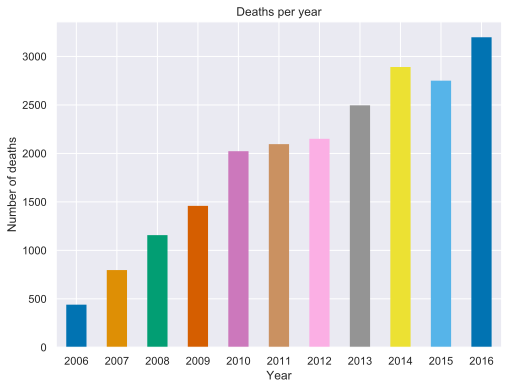

In [9]:
pd.value_counts(df['death_year'], sort=False).sort_index().plot.bar(color=my_cp, rot=0)
plt.title('Deaths per year')
plt.ylabel('Number of deaths')
plt.xlabel('Year')
plt.savefig("deaths_per_year", bbox_inches='tight', dpi=256)
plt.show()

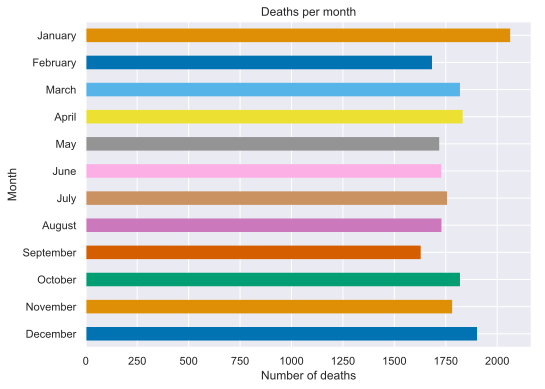

In [10]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']
pd.value_counts(df['death_month'], sort=False)[months_order[::-1]].plot.barh(color=my_cp)
plt.title('Deaths per month')
plt.xlabel('Number of deaths')
plt.ylabel('Month')
plt.savefig("deaths_per_month", bbox_inches='tight', dpi=256)
plt.show()

In [11]:
time_counts = df.groupby(['death_year', 'death_month'], sort=False).size().reset_index(name='counts')
time_counts.head()

death_year death_month  counts
0        2006     January      24
1        2006    February      13
2        2006       March      26
3        2006       April      18
4        2006         May      27

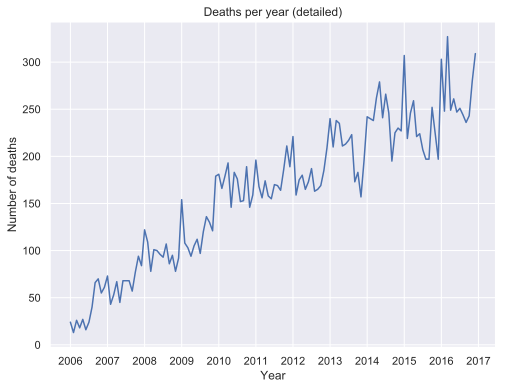

In [12]:
time_counts.counts.plot()
plt.xticks([i * 12 for i in range(12)], [2006 + i for i in range(12)])
plt.title("Deaths per year (detailed)")
plt.ylabel('Number of deaths')
plt.xlabel('Year')
plt.show()

### Группировка причин смерти

In [13]:
pd.value_counts(df.cause_of_death)

N/A                                                                              12484
cancer                                                                            1119
heart attack                                                                       739
heart failure                                                                      388
natural causes                                                                     295
lung cancer                                                                        267
pneumonia                                                                          242
stroke                                                                             228
after long illness                                                                 185
pancreatic cancer                                                                  177
Alzheimer's disease                                                                146
traffic collision                          

In [14]:
pd.value_counts(df.cause_of_death).size

1721

In [15]:
# Auxillary functions
replace_cod_regexp = lambda before, after: df.cause_of_death.replace(".*" + before + ".*", after, inplace=True, regex=True)
show_cod = lambda name: pd.value_counts(df[df.cause_of_death.str.contains(name)].cause_of_death)

In [16]:
def check_and_replace_cod(cod_list, cod_name=None):
    for cod in cod_list:
        print("Cause substring: ", cod)
        print(show_cod(cod))
        print()
        
    if cod_name is not None:
        for cod in cod_list:
            replace_cod_regexp(cod, cod_name)
            
    return cod_name

In [17]:
main_death_causes = []

In [18]:
# Group: accidents
main_death_causes.append(check_and_replace_cod(['accident', 'crash', 'fall', 'collision', 'car'], 'accident'))

Cause substring:  accident
car accident                                       63
motorcycle accident                                 9
road accident                                       7
accidental drug overdose                            5
tractor accident                                    3
traffic accident                                    3
accidental fall                                     3
accidental prescription drug overdose               2
mountaineering accident                             2
bicycle accident                                    2
complications from ATV accident                     1
accidental overdose of hydrocodone and morphine     1
accidental drug and alcohol overdose                1
accidental overdose of fentanyl                     1
from injuries sustained in a biking accident        1
race accident                                       1
skiing accident                                     1
sleep apnea and accidental overdose                 1
a

In [19]:
# Group: suicide
main_death_causes.append(check_and_replace_cod(['suic', 'self'], 'suicide'))

Cause substring:  suic
suicide                                    49
suicide by gunshot                         39
suicide by hanging                         27
suicide by jumping                         14
apparent suicide by gunshot                 6
apparent suicide                            5
apparent suicide by hanging                 4
suspected suicide                           4
suspected suicide by hanging                3
suicide by self-defenestration              3
assisted suicide                            2
suspected suicide by gunshot                2
suicide by drug overdose                    2
suicide by train                            2
suicide bombing                             2
suicide by standing in front of a train     1
suicide by alcohol and drug overdose        1
suicide by jumping from bridge              1
suicide by wrist cutting                    1
physician-assisted suicide                  1
suicide by poisoning                        1
suicide by 

In [20]:
# Group: drugs & alcohol
main_death_causes.append(check_and_replace_cod(['dru', 'alcoh', 'heroi'], 'drugs & alcohol'))

Cause substring:  dru
drug overdose                    8
suspected drug overdose          2
mixed drug intoxication          2
multiple drug intoxication       1
apparent drug overdose           1
complications from drug abuse    1
Name: cause_of_death, dtype: int64

Cause substring:  alcoh
heroin and alcohol overdose      1
alcoholic liver disease [260]    1
Name: cause_of_death, dtype: int64

Cause substring:  heroi
heroin overdose                3
heroin and alcohol overdose    1
Name: cause_of_death, dtype: int64



In [21]:
# Group: cancer
main_death_causes.append(check_and_replace_cod(['leu', 'cancer', 'tumo', 'oma'], 'cancer'))

Cause substring:  leu
leukemia                                        91
leukaemia                                       14
acute myeloid leukemia                           8
complications from leukemia                      8
myeloid leukemia                                 1
lymphoid leukemia                                1
chronic lymphocytic leukemia                     1
acute myelocytic leukemia                        1
chronic leukemia                                 1
acute erythroid leukaemia                        1
leukemia-induced pneumonia                       1
complications of pneumonia from leukemia         1
complications of leukemia                        1
stroke related to acute myelogenous leukemia     1
paralytic ileus                                  1
acute leukemia                                   1
Name: cause_of_death, dtype: int64

Cause substring:  cancer
cancer                                                     1119
lung cancer                          

In [22]:
# Group: natural causes
main_death_causes.append(check_and_replace_cod(['heal', 'sleep', 'natura'], 'natural causes'))

Cause substring:  heal
poor health                 1
multiple health problems    1
Name: cause_of_death, dtype: int64

Cause substring:  sleep
died in his sleep    1
in his sleep         1
sleep apnea          1
Name: cause_of_death, dtype: int64

Cause substring:  natura
natural causes         295
natural causes [33]      1
natural causes [1]       1
Name: cause_of_death, dtype: int64



In [23]:
# Group: murder
main_death_causes.append(check_and_replace_cod(['shot', 'stabb', 'smoth', 'murder'], 'murder'))

Cause substring:  shot
shot                                 116
shot by police                         2
gunshot                                1
ordered KAL 007 to be shot down        1
homicide by gunshot                    1
shot during Manila hostage crisis      1
shot and stabbed                       1
Name: cause_of_death, dtype: int64

Cause substring:  stabb
stabbed                 16
stabbing                 2
shot and stabbed         1
beating and stabbing     1
Name: cause_of_death, dtype: int64

Cause substring:  smoth
smothered    1
Name: cause_of_death, dtype: int64

Cause substring:  murder
murdered                                                     5
murder by strangulation                                      1
convicted of conspiracy to murder and firearms possession    1
Name: cause_of_death, dtype: int64



In [24]:
# Group: heart
main_death_causes.append(check_and_replace_cod(['cardi', 'heart'], 'heart'))

Cause substring:  cardi
Series([], Name: cause_of_death, dtype: int64)

Cause substring:  heart
heart attack                                            739
heart failure                                           388
heart disease                                            54
apparent heart attack                                    17
suspected heart attack                                   16
complications from a heart attack                        15
complications from heart surgery                          9
heart ailment                                             8
heart and kidney failure                                  8
heart condition                                           8
heart problems                                            7
complications from heart attack                           6
complications following heart surgery                     6
heart failure and pneumonia                               5
complications of heart surgery                            4
cong

In [25]:
# Group: injury
main_death_causes.append(check_and_replace_cod(['injury', 'traum'], 'injury'))

Cause substring:  injury
head injury                                 5
complications from a brain injury           1
euthanized after race injury                1
complications from back injury              1
head injury from boat propeller             1
spinal cord injury                          1
neck injury                                 1
complications of neck injury during game    1
head injury from projectile                 1
Name: cause_of_death, dtype: int64

Cause substring:  traum
blunt force trauma                    2
brain trauma                          2
blunt traumatic asphyxia              1
head trauma                           1
traumatic aortic rupture              1
blunt force trauma while skiing       1
blunt force head trauma               1
traumatic dementia encephalophathy    1
Name: cause_of_death, dtype: int64



In [26]:
# Group: brain
main_death_causes.append(check_and_replace_cod(['brain', 'dement', 'Alzh', 'Parkins'], 'brain'))

Cause substring:  brain
brain aneurysm                                                     19
brain hemorrhage                                                   12
brain haemorrhage                                                   7
complications from brain surgery                                    2
complications from brain hemorrhage                                 2
hemorrhagic brain stroke                                            1
brain aneurism                                                      1
massive brain hemorrhage                                            1
complications from a brain haemorrhage                              1
complications from brain haemorrhage                                1
cystic growth on the brain                                          1
complications from brain bleeding and surgery                       1
degenerative brain disease                                          1
complications of brain surgery                                    

In [27]:
# Group: respiratory
main_death_causes.append(check_and_replace_cod(['pneumonia', 'respiratory', 'emphysema'], 'respiratory'))

Cause substring:  pneumonia
pneumonia                                              242
complications from pneumonia                            46
complications of pneumonia                              13
bronchial pneumonia                                      3
aspiration pneumonia                                     2
pneumonia and diabetes                                   1
complication from pneumonia                              1
complications from pneumonia and multiple sclerosis      1
viral pneumonia                                          1
pneumonia as a complication from a stroke                1
pneumonia and kidney failure                             1
complications of pneumonia from surgery                  1
double pneumonia                                         1
complications of influenza and pneumonia                 1
acute pneumonia                                          1
sepsis following influenza and pneumonia                 1
pneumonia following a stroke

In [28]:
# Group: kidneys
main_death_causes.append(check_and_replace_cod(['renal', 'kidney'], 'kidneys'))

Cause substring:  renal
renal failure                                                 24
complications from renal failure                               2
renal disease                                                  2
atrial fibrillation and chronic renal failure                  1
renal and pulmonary failure                                    1
euthanized following adrenal disease and hoof inflammation     1
Name: cause_of_death, dtype: int64

Cause substring:  kidney
kidney failure                                      60
kidney disease                                       8
complications of kidney failure                      2
complications from kidney transplant                 2
liver and kidney failure                             2
chronic kidney disease                               2
malignant hypertension leading to kidney failure     1
kidney and liver failure                             1
complications of kidney disease                      1
complications from kidney dise

In [29]:
# Group: diabetes
main_death_causes.append(check_and_replace_cod(['diabetes'], 'diabetes'))

Cause substring:  diabetes
diabetes                                           29
complications from diabetes                        20
complications of diabetes                           7
illnesses related to diabetes                       1
diabetes-related stroke                             1
complications from hypertension and diabetes        1
diabetes complications                              1
pulmonary failure as a complication of diabetes     1
diabetes mellitus                                   1
complications of diabetes and stroke                1
complications of a stroke and diabetes              1
Name: cause_of_death, dtype: int64



In [30]:
# Group: illness
main_death_causes.append(check_and_replace_cod(['illness', 'sickness', 'disease'], 'illness'))

Cause substring:  illness
after long illness                   185
after short illness                   52
illness                                7
after brief illness                    6
long illness                           5
after a long illness                   4
following a long illness               3
short illness                          3
infection from a chronic illness       1
complications from a long illness      1
stroke-related illness                 1
after a short illness                  1
after illness                          1
following a short illness              1
after an illness                       1
Name: cause_of_death, dtype: int64

Cause substring:  sickness
altitude sickness    1
Name: cause_of_death, dtype: int64

Cause substring:  disease
lung disease                                                             17
motor neurone disease                                                    15
chronic obstructive pulmonary disease                      

In [31]:
# Group: stroke
main_death_causes.append(check_and_replace_cod(['stroke', 'hemorrhage'], 'stroke'))

Cause substring:  stroke
stroke                                                                           228
complications from a stroke                                                       85
complications of a stroke                                                         18
complications from stroke                                                          7
complications from strokes                                                         4
complications of stroke                                                            4
complications following a stroke                                                   3
stroke complications                                                               3
heat stroke                                                                        2
multiple strokes                                                                   1
complications from heatstroke and exhaustion                                       1
strokes                                 

In [32]:
# Group: organ failure
main_death_causes.append(check_and_replace_cod(['organ'], 'organ failure'))

Cause substring:  organ
multiple organ failure                     43
multiple organ dysfunction syndrome        11
organ failure                               3
Morgan Freeman and Darth Vader              1
dengue fever and multiple organ failure     1
Name: cause_of_death, dtype: int64



In [33]:
pd.value_counts(df.cause_of_death)

N/A                                                        12484
cancer                                                      2767
heart                                                       1379
accident                                                     735
respiratory                                                  463
brain                                                        413
stroke                                                       401
illness                                                      372
natural causes                                               302
suicide                                                      178
murder                                                       150
kidneys                                                      121
diabetes                                                      64
organ failure                                                 59
U                                                             50
amyotrophic lateral scler

In [34]:
pd.value_counts(df.cause_of_death)[:20]

N/A                              12484
cancer                            2767
heart                             1379
accident                           735
respiratory                        463
brain                              413
stroke                             401
illness                            372
natural causes                     302
suicide                            178
murder                             150
kidneys                            121
diabetes                            64
organ failure                       59
U                                   50
amyotrophic lateral sclerosis       37
member of the U                     36
complications from surgery          30
injury                              23
pulmonary embolism                  23
Name: cause_of_death, dtype: int64

In [35]:
main_death_causes

['accident',
 'suicide',
 'drugs & alcohol',
 'cancer',
 'natural causes',
 'murder',
 'heart',
 'injury',
 'brain',
 'respiratory',
 'kidneys',
 'diabetes',
 'illness',
 'stroke',
 'organ failure']

In [36]:
df.loc[~df["cause_of_death"].isin(main_death_causes + ['N/A']), "cause_of_death"].value_counts()

U                                                                                          50
amyotrophic lateral sclerosis                                                              37
member of the U                                                                            36
complications from surgery                                                                 30
pulmonary embolism                                                                         23
euthanized                                                                                 20
at the Wayback Machine                                                                     19
2012                                                                                       19
drowning                                                                                   18
pulmonary fibrosis                                                                         17
drowned                                                     

In [37]:
df.loc[~df["cause_of_death"].isin(main_death_causes + ['N/A']), "cause_of_death"] = 'other causes'

In [38]:
# Auxillary
cod_desc_order = pd.value_counts(df.cause_of_death).index.tolist()
top_cod = ["drugs & alcohol", "suicide", "accident", "murder", "injury"]
top_cod = [cod for cod in cod_desc_order if cod in top_cod]
top_cod_cp = [my_cp[i] for i in range(len(cod_desc_order)) if cod_desc_order[i] in top_cod]

### Визуализация основных причин смерти

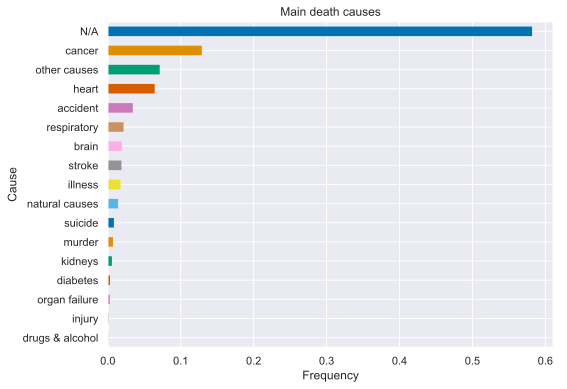

In [39]:
pd.value_counts(df.cause_of_death, ascending=True, normalize=True).plot.barh(color=my_cp[:len(cod_desc_order)][::-1])
plt.title('Main death causes')
plt.ylabel('Cause')
plt.xlabel('Frequency')
plt.savefig("cod_freq", bbox_inches='tight', dpi=256)
plt.show()

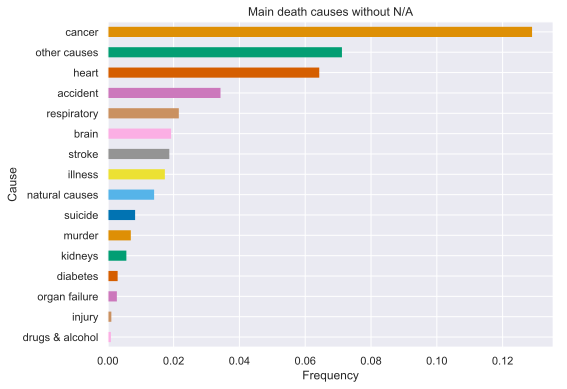

In [40]:
pd.value_counts(df.cause_of_death, ascending=True, normalize=True)[:-1].plot.barh(color=my_cp[:len(cod_desc_order)][::-1])
plt.title('Main death causes without N/A')
plt.ylabel('Cause')
plt.xlabel('Frequency')
plt.savefig("cod_freq_wna", bbox_inches='tight', dpi=256)
plt.show()

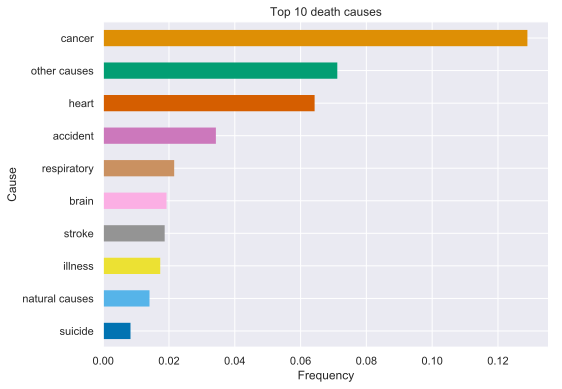

In [41]:
pd.value_counts(df.cause_of_death, ascending=True, normalize=True)[-11:-1].plot.barh(color=my_cp[:11][::-1])
plt.title('Top 10 death causes')
plt.ylabel('Cause')
plt.xlabel('Frequency')
plt.savefig("top10_cod_freq", bbox_inches='tight', dpi=256)
plt.show()

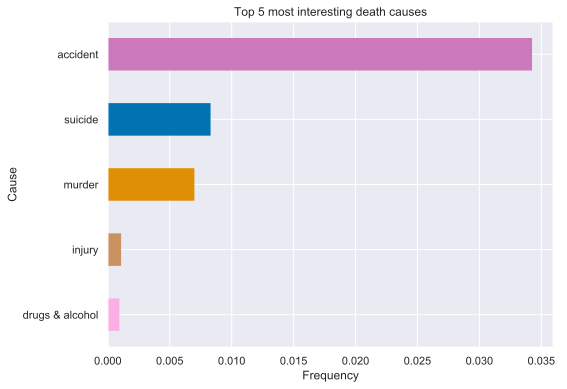

In [42]:
pd.value_counts(df.cause_of_death, ascending=True, normalize=True)[top_cod[::-1]].plot.barh(color=top_cod_cp[::-1])
plt.title('Top 5 most interesting death causes')
plt.ylabel('Cause')
plt.xlabel('Frequency')
plt.savefig("top5_cod_freq", bbox_inches='tight', dpi=256)
plt.show()

### Причины смерти по времени

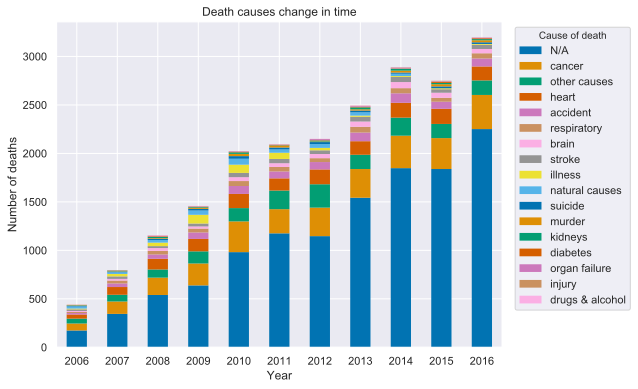

In [44]:
death_causes_by_year = pd.crosstab(df.death_year, df.cause_of_death)
death_causes_by_year = death_causes_by_year[cod_desc_order]
death_causes_by_year.plot.bar(color=my_cp, stacked=True, rot=0)
plt.legend(title="Cause of death", loc=1, bbox_to_anchor=(1.3, 1))
plt.title("Death causes change in time")
plt.xlabel("Year")
plt.ylabel("Number of deaths")
plt.show()

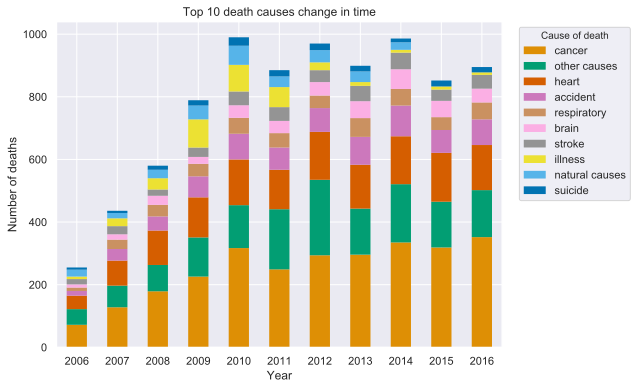

In [45]:
death_causes_by_year.iloc[:, 1:11].plot.bar(color=my_cp[1:], rot=0, stacked=True)
plt.legend(loc=2)
plt.title("Top 10 death causes change in time")
plt.xlabel("Year")
plt.ylabel("Number of deaths")
plt.legend(title="Cause of death", loc=1, bbox_to_anchor=(1.3, 1))
plt.savefig("top10_cod_time", bbox_inches='tight', dpi=256)
plt.show()

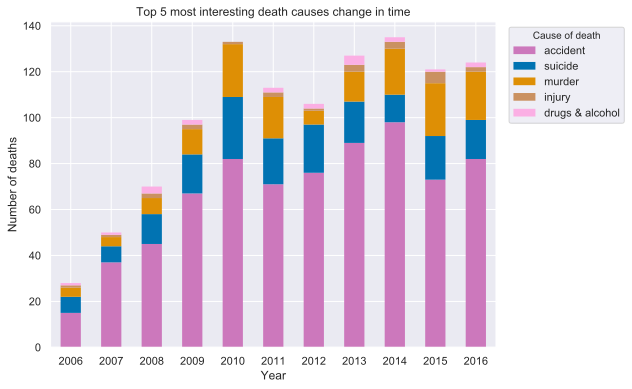

In [46]:
death_causes_by_year[top_cod].plot.bar(color=top_cod_cp, rot=0, stacked=True)
plt.title("Top 5 most interesting death causes change in time")
plt.xlabel("Year")
plt.ylabel("Number of deaths")
plt.legend(title="Cause of death", loc=1, bbox_to_anchor=(1.3, 1))
plt.savefig("top5_cod_time", bbox_inches='tight', dpi=256)
plt.show()

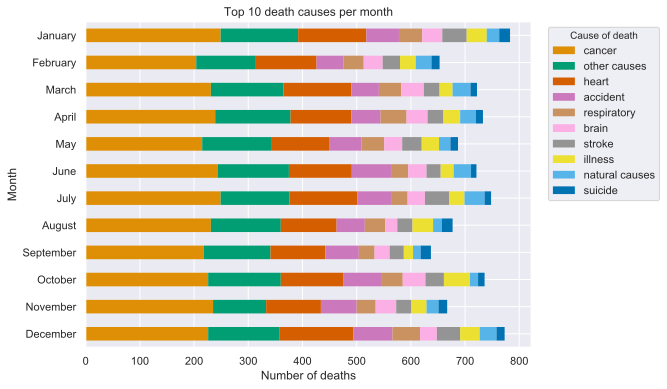

In [47]:
pd.crosstab(df.death_month, df.cause_of_death)[cod_desc_order[1:11]].reindex(months_order[::-1]).plot.barh(color=my_cp[1:], rot=0, stacked=True)
plt.legend(loc=2)
plt.title("Top 10 death causes per month")
plt.ylabel("Month")
plt.xlabel("Number of deaths")
plt.legend(title="Cause of death", loc=1, bbox_to_anchor=(1.3, 1))
plt.savefig("top10_cod_month", bbox_inches='tight', dpi=256)
plt.show()

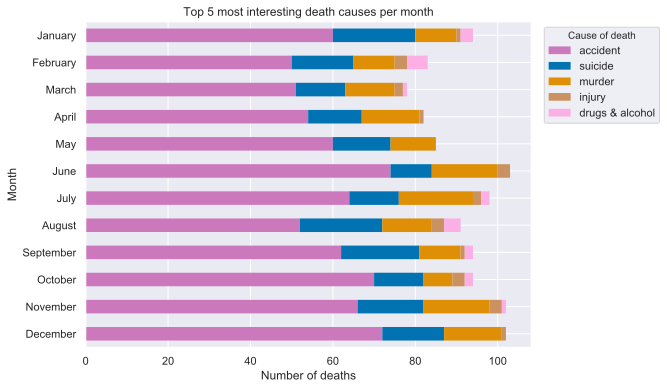

In [48]:
pd.crosstab(df.death_month, df.cause_of_death)[top_cod].reindex(months_order[::-1]).plot.barh(color=top_cod_cp, rot=0, stacked=True)
plt.legend(loc=2)
plt.title("Top 5 most interesting death causes per month")
plt.ylabel("Month")
plt.xlabel("Number of deaths")
plt.legend(title="Cause of death", loc=1, bbox_to_anchor=(1.3, 1))
plt.savefig("top5_cod_month", bbox_inches='tight', dpi=256)
plt.show()

### Анализ по национальностям

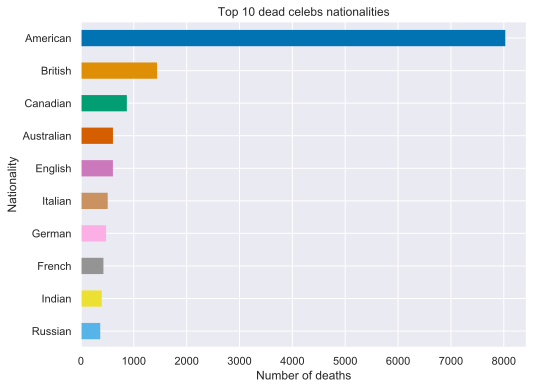

In [49]:
pd.value_counts(df.nationality)[:10][::-1].plot.barh(color=my_cp[::-1], rot=0)
plt.title("Top 10 dead celebs nationalities")
plt.ylabel("Nationality")
plt.xlabel("Number of deaths")
plt.show()

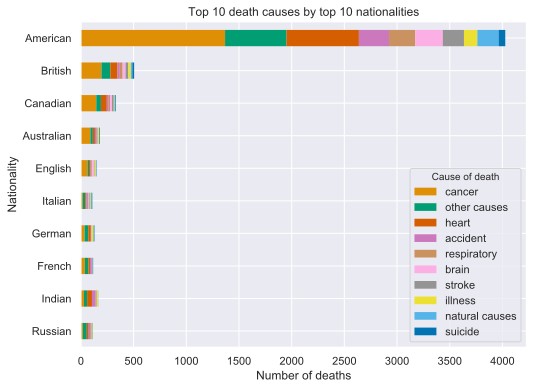

In [50]:
pd.crosstab(df.nationality, df.cause_of_death)[cod_desc_order[1:11]].reindex(df.nationality.value_counts().index)[:10][::-1].plot.barh(color=my_cp[1:], stacked=True, rot=0)
plt.title("Top 10 death causes by top 10 nationalities")
plt.xlabel("Number of deaths")
plt.ylabel("Nationality")
plt.legend(title="Cause of death")
plt.savefig("top10cod_top10nat", bbox_inches='tight', dpi=256)
plt.show()

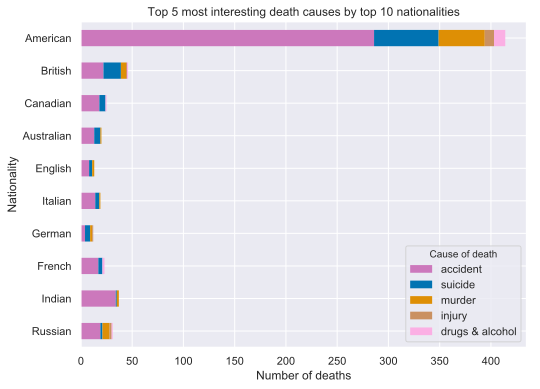

In [51]:
pd.crosstab(df.nationality, df.cause_of_death)[top_cod].reindex(df.nationality.value_counts().index)[:10][::-1].plot.barh(color=top_cod_cp, stacked=True, rot=0)
plt.title("Top 5 most interesting death causes by top 10 nationalities")
plt.xlabel("Number of deaths")
plt.ylabel("Nationality")
plt.legend(title="Cause of death")
plt.savefig("top5cod_top10nat", bbox_inches='tight', dpi=256)
plt.show()

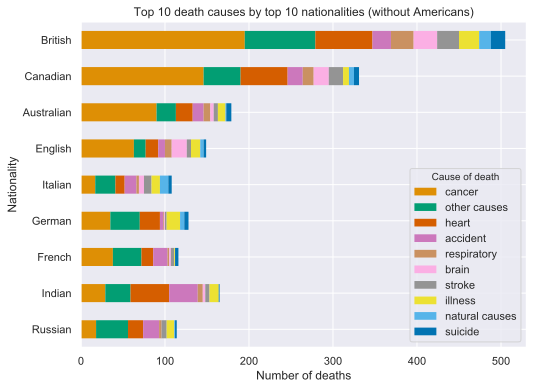

In [52]:
pd.crosstab(df.nationality, df.cause_of_death)[cod_desc_order[1:11]].reindex(df.nationality.value_counts().index)[1:10][::-1].plot.barh(color=my_cp[1:], stacked=True, rot=0)
plt.title("Top 10 death causes by top 10 nationalities (without Americans)")
plt.xlabel("Number of deaths")
plt.ylabel("Nationality")
plt.legend(title="Cause of death")
plt.savefig("top10cod_top10nat_wa", bbox_inches='tight', dpi=256)
plt.show()

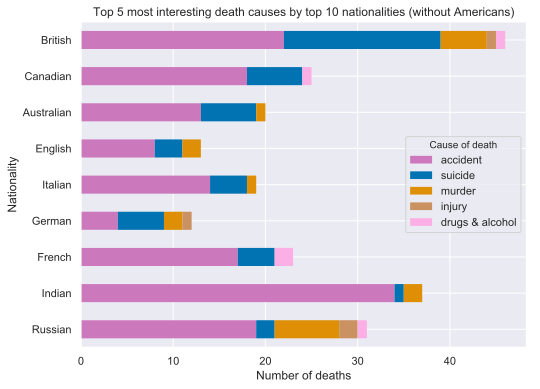

In [53]:
pd.crosstab(df.nationality, df.cause_of_death)[top_cod].reindex(df.nationality.value_counts().index)[1:10][::-1].plot.barh(color=top_cod_cp, stacked=True, rot=0)
plt.title("Top 5 most interesting death causes by top 10 nationalities (without Americans)")
plt.xlabel("Number of deaths")
plt.ylabel("Nationality")
plt.legend(title="Cause of death")
plt.savefig("top5cod_top10nat_wa", bbox_inches='tight', dpi=256)
plt.show()

### Анализ по возрасту

In [55]:
df.age.describe()

count    21458.000000
mean        76.004567
std         15.967147
min          0.000000
25%         68.000000
50%         80.000000
75%         87.000000
max        125.000000
Name: age, dtype: float64

In [56]:
df[df.age != df.death_year - df.birth_year]

Empty DataFrame
Columns: [age, birth_year, cause_of_death, death_month, death_year, famous_for, name, nationality, fame_score]
Index: []

In [57]:
df[df.age < 16]

age  birth_year  cause_of_death death_month  death_year  \
3154     3        2006         illness        July        2009   
3633     4        2005           heart    November        2009   
5528     2        2008  natural causes     October        2010   
5575    11        1999          cancer    November        2010   
7617    15        1996    other causes    November        2011   
7779     0        2011             N/A    November        2011   
7970    10        2001    other causes    December        2011   
8258    11        2001        accident    February        2012   
8415    14        1998             N/A       March        2012   
8704    10        2002             N/A       April        2012   
8749    15        1997    other causes         May        2012   
8777    14        1998        accident         May        2012   
8856    10        2002    other causes         May        2012   
9175     8        2004        accident        July        2012   
9279     6        2006             N/A      August        2012   
9367     3        2009    other causes      August        2012   
9373    12        2000    other causes      August        2012   
9424     6        2006    other causes   September        2012   
9725    10        2002    other causes     October        2012   
10026    7        2005           heart    December        2012   
10192   12        2001             N/A     January        2013   
10363   12        2001          cancer    February        2013   
10585   10        2003             N/A       March        2013   
10660   13        2000    other causes       March        2013   
11905    9        2004        accident      August        2013   
12405    8        2005             N/A    November        2013   
13756    9        2005          cancer         May        2014   
15077    6        2008        accident    November        2014   
15078    6        2008    other causes    November        2014   
15282    4        2010          injury    November        2014   
15418   15        1999    other causes    December        2014   
17026   15        2000         suicide        July        2015   
17236   13        2002    other causes      August        2015   
19101   11        2005             N/A       March        2016   

                                              famous_for  \
3154   Downing Street cat Chief Mouser to the Cabinet...   
3633      English bulldog mascot (University of Georgia)   
5528   World Cup oracle octopus (Sea Life Centre in O...   
5575                             actress (The Lion King)   
7617   Canadian show jumping horse Olympic champion (...   
7779                                                 N/A   
7970                                 Artist and Designer   
8258   Thoroughbred racehorse winner of the National ...   
8415                  winner of the Sussex Stakes (2001)   
8704                                             at 101"   
8749   racehorse winner of the Australian Cup (2001 2...   
8777                                  film actress (Paa)   
8856                                         and Teacher   
9175   racehorse winner of the Duke of York Stakes (2...   
9279   winner of the Coolmore Classic (2009) and Futu...   
9367   French-trained Thoroughbred racehorse winner o...   
9373   British-trained Thoroughbred racehorse winner ...   
9424   Thoroughbred racehorse winner of the Breeders'...   
9725                                       War Historian   
10026                             canine actor (Red Dog)   
10192                    winner of Travers Stakes (2003)   
10363  Scottish Terrier First Dog of President George...   
10585                     winner of Caulfield Cup (2007)   
10660                           Irish thoroughbred horse   
11905  English Bulldog mascot of Butler University (2...   
12405                         World's Ugliest Dog (2007)   
13756        Scottish terrier co-First Dog (2005ÛÒ2009)   
15077    Thoroug

In [58]:
df[df.age > 110]

age  birth_year  cause_of_death death_month  death_year  \
399    116        1890  natural causes    December        2006   
2394   111        1898    other causes     January        2009   
2422   113        1896    other causes     January        2009   
3064   113        1896    other causes        June        2009   
3560   113        1896             N/A    November        2009   
7980   113        1899    other causes     January        2012   
8006   111        1901    other causes     January        2012   
12997  125        1889    other causes    February        2014   
15653  114        1901    other causes     January        2015   

                                              famous_for  \
399           oldest verified person in the world (2006)   
2394                                    supercentenarian   
2422                                    supercentenarian   
3064                                    supercentenarian   
3560                                    supercentenarian   
7980                                    supercentenarian   
8006   silent film screenwriter (The Plastic Age) pla...   
12997         loblolly pine (Augusta National Golf Club)   
15653  supercentenarian nation's oldest person (since...   

                            name nationality  fame_score  
399             Elizabeth Bolden    American         2.0  
2394               Aarne Arvonen     Finnish         4.0  
2422   Manuela FernÌÁndez-Fojaco     Spanish        22.0  
3064          Lucia Lauria Vigna     Italian        27.0  
3560                Ida Frabboni     Italian        27.0  
7980           Marcelle Narbonne      French         3.0  
8006        Frederica Sagor Maas    American        13.0  
12997            Eisenhower Tree    American        14.0  
15653                 Ethel Lang     British         9.0

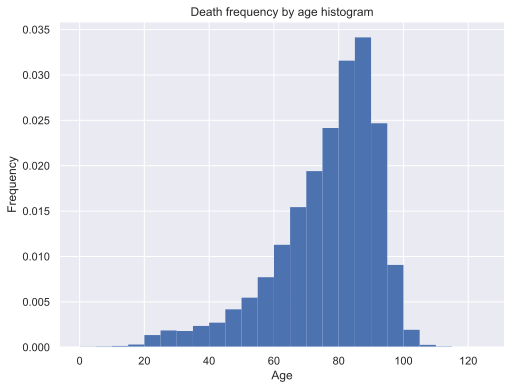

In [59]:
df.age.plot.hist(bins=25, density=True)
plt.xlabel("Age")
plt.title("Death frequency by age histogram")
plt.show()

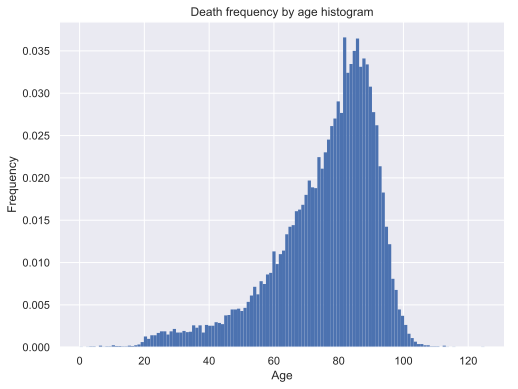

In [60]:
df.age.plot.hist(bins=df.age.max() + 1, density=True)
plt.xlabel("Age")
plt.title("Death frequency by age histogram")
plt.savefig("age_hist", bbox_inches='tight', dpi=256)
plt.show()

### Группировка по возрасту

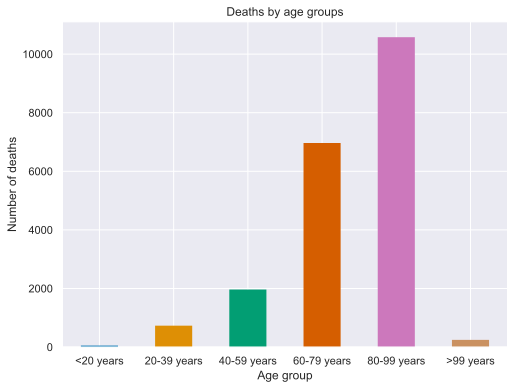

In [61]:
df["age_group"] = pd.Series()

age_groups = [(0, 19), (20, 39), (40, 59), (60, 79), (80, 99), (100, 200)]
age_group_names = ["<20 years", "20-39 years", "40-59 years", "60-79 years", "80-99 years", ">99 years"]

for (age_from, age_to), ag_name in zip(age_groups, age_group_names):
    df.loc[df.age.between(age_from, age_to - 1), "age_group"] = ag_name
    
df.age_group.value_counts()[age_group_names].plot.bar(color=my_cp, rot=0)
plt.title("Deaths by age groups")
plt.ylabel("Number of deaths")
plt.xlabel("Age group")
plt.savefig("ag_bar", bbox_inches='tight', dpi=256)
plt.show()

### Анализ причин смерти по возрасту

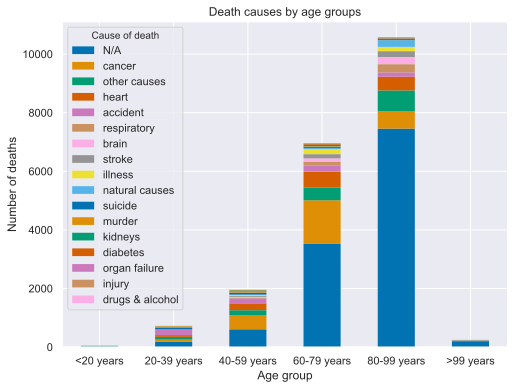

In [62]:
ag_cod_ct = pd.crosstab(df.age_group, df.cause_of_death).reindex(age_group_names)[cod_desc_order]
ag_cod_ct.plot.bar(color=my_cp, stacked=True, rot=0)
plt.title("Death causes by age groups")
plt.ylabel("Number of deaths")
plt.xlabel("Age group")
plt.legend(title="Cause of death")
plt.show()

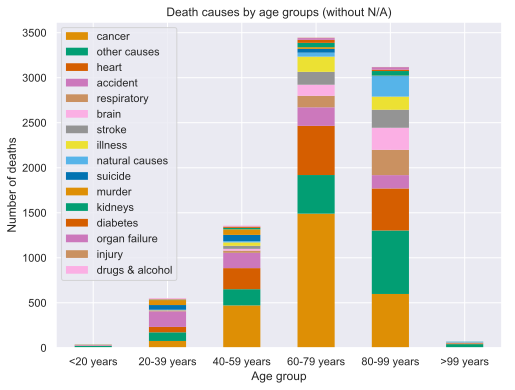

In [63]:
ag_cod_ct = pd.crosstab(df.age_group, df.cause_of_death[~df.cause_of_death.str.contains("N/A")]).reindex(age_group_names)[cod_desc_order[1:]]
ag_cod_ct.plot.bar(color=my_cp[1:], stacked=True, rot=0)
plt.title("Death causes by age groups (without N/A)")
plt.ylabel("Number of deaths")
plt.xlabel("Age group")
plt.legend(title="")
plt.show()

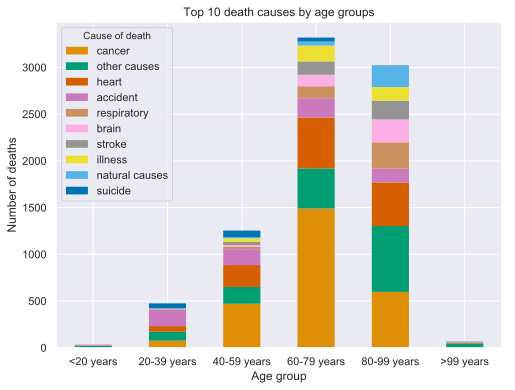

In [64]:
ag_cod_ct = pd.crosstab(df.age_group, df.cause_of_death[~df.cause_of_death.str.contains("N/A")]).reindex(age_group_names)[cod_desc_order[1:11]]
ag_cod_ct.plot.bar(color=my_cp[1:], stacked=True, rot=0)
plt.title("Top 10 death causes by age groups")
plt.ylabel("Number of deaths")
plt.xlabel("Age group")
plt.legend(title="Cause of death")
plt.savefig("top10cod_ag", bbox_inches='tight', dpi=256)
plt.show()

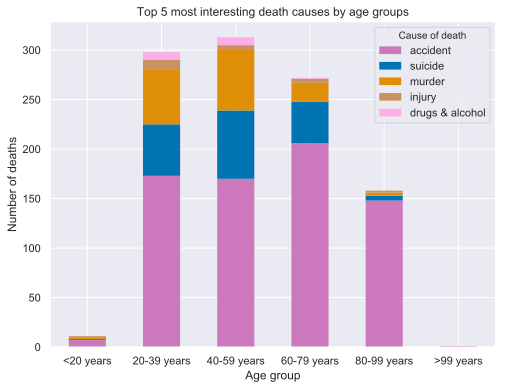

In [65]:
ag_cod_ct = pd.crosstab(df.age_group, df.cause_of_death[df.cause_of_death.isin(top_cod)]).reindex(age_group_names)[top_cod]
ag_cod_ct.plot.bar(color=top_cod_cp, stacked=True, rot=0)
plt.title("Top 5 most interesting death causes by age groups")
plt.ylabel("Number of deaths")
plt.xlabel("Age group")
plt.legend(title="Cause of death")
plt.savefig("top5cod_ag", bbox_inches='tight', dpi=256)
plt.show()

### Анализ по степени известности

In [66]:
df.fame_score.describe()

count    21458.000000
mean         7.903346
std         19.537605
min         -1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        695.000000
Name: fame_score, dtype: float64

In [67]:
df.loc[df.fame_score > 0, "fame_score"].describe()

count    19852.000000
mean         8.623615
std         20.141204
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        695.000000
Name: fame_score, dtype: float64

In [54]:
df[df.fame_score >= df.fame_score.max() - 400]

age  birth_year  cause_of_death death_month  death_year  \
1117    88        1919             N/A    November        2007   
1303    64        1944         kidneys     January        2008   
1860    86        1922  natural causes        July        2008   
2859    73        1936          cancer         May        2009   
3053    50        1959    other causes        June        2009   
3258    77        1932          cancer      August        2009   
7014    27        1984        accident        July        2011   
7506    69        1942    other causes     October        2011   
8261    48        1964        accident    February        2012   
9626    89        1923           heart     October        2012   
9651    90        1922    other causes     October        2012   
10599   58        1955           heart       March        2013   
10864   87        1926          stroke       April        2013   
12456   95        1918    other causes    December        2013   
13991   73        1941             N/A        June        2014   
14275   56        1958             N/A        July        2014   
15812   92        1923           heart     January        2015   
18366   69        1947          cancer     January        2016   
19067   68        1948          cancer       March        2016   
21075   90        1926             N/A    November        2016   

                                              famous_for  \
1117                        Prime Minister (1964ÛÒ1979)   
1303      chess grandmaster world champion (1972ÛÒ1975)   
1860   politician senator from North Carolina (1973Û...   
2859   politician and football player candidate for V...   
3053   pop singerÛÒsongwriter ("Thriller" "Billie Je...   
3258   politician Senator from Massachusetts (1962ÛÒ...   
7014                         singer-songwriter ("Rehab")   
7506                                leader (1969ÛÒ2011)   
8261   singer ("I Will Always Love You") and actress ...   
9626   royal King (1941ÛÒ1955 1993ÛÒ2004) and nine-...   
9651   politician and USAAF pilot U.S. Representative...   
10599  politician and military officer President (sin...   
10864  politician Prime Minister (1979ÛÒ1990); MP fo...   
12456  African anti-apartheid activist and politician...   
13991      South Korean religious leader and businessman   
14275                                        since 2013)   
15812                           actress (Dead Reckoning)   
18366  singer-songwriter musician ("Space Oddity" "He...   
19067  football player and manager (AFC Ajax FC Barce...   
21075                            President (1976ÛÒ2008)   

                                                    name    nationality  \
1117                                           Ian Smith      Rhodesian   
1303                                       Bobby Fischer       American   
1860                                         Jesse Helms       American   
2859                                           Jack Kemp       American   
3053                                     Michael Jackson       American   
3258                                         Ted Kennedy       American   
7014                                       Amy Winehouse        British   
7506                                     Muammar Gaddafi         Libyan   
8261                                     Whitney Houston       American   
9626                                    Norodom Sihanouk      Cambodian   
9651                                     George McGovern       American   
10599                                       Hugo ChÌÁvez     Venezuelan   
10864                                  Margaret Thatcher        British   
12456                                     Nelson Mandela          South   
13991                                      Yoo Byung-eun  Japanese-born   
14275  Notable people killed in the crash of Malaysia...     Australian   
15812                                     Lizabeth Scott       American   
18366    

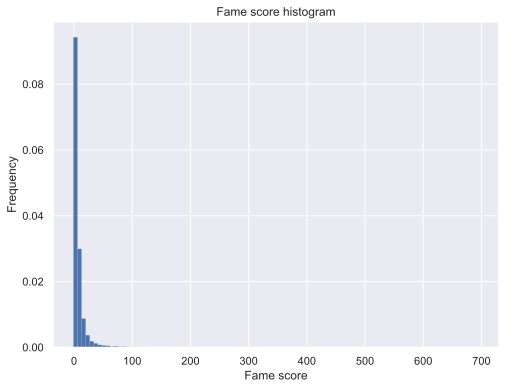

In [68]:
df.fame_score.plot.hist(bins=100, density=True)
plt.title("Fame score histogram")
plt.xlabel("Fame score")
plt.show()

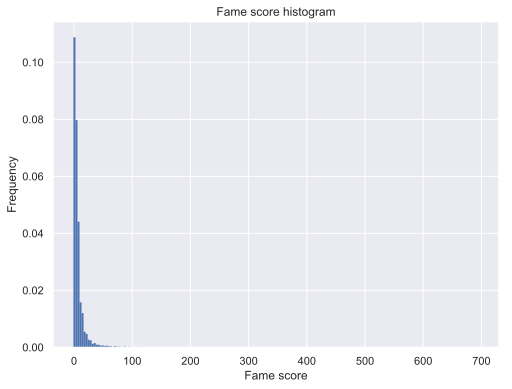

In [69]:
df.fame_score.plot.hist(bins=200, density=True)
plt.title("Fame score histogram")
plt.xlabel("Fame score")
plt.savefig("fs_hist", bbox_inches='tight', dpi=256)
plt.show()

### Группировка по степени известности

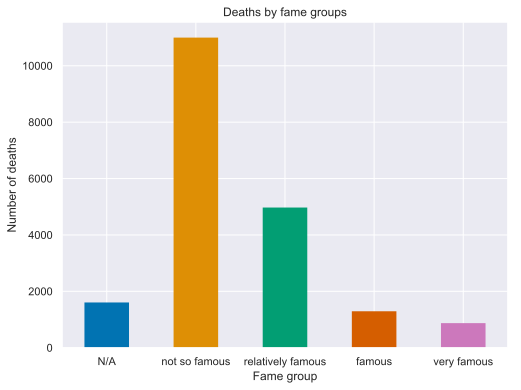

In [70]:
df["fame_group"] = pd.Series()

fame_groups = [(-1, 0), (1, 5), (6, 15), (16, 30), (31, 1000)]
fame_group_names = ["N/A", "not so famous", "relatively famous", "famous", "very famous"]

for (fame_from, fame_to), fg_name in zip(fame_groups, fame_group_names):
    df.loc[df.fame_score.between(fame_from, fame_to - 1), "fame_group"] = fg_name
    
df.fame_group.value_counts()[fame_group_names].plot.bar(color=my_cp, rot=0)
plt.title("Deaths by fame groups")
plt.ylabel("Number of deaths")
plt.xlabel("Fame group")
plt.savefig("fs_bins", bbox_inches='tight', dpi=256)
plt.show()

### Анализ причин смерти по степени известности

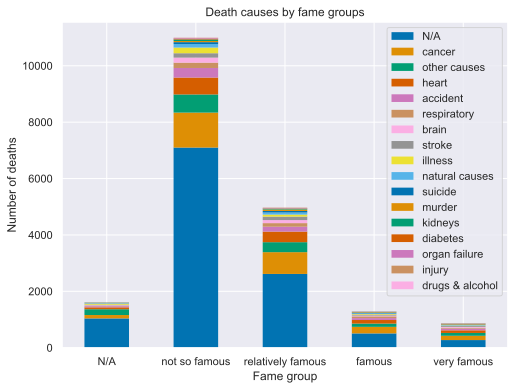

In [71]:
pd.crosstab(df.fame_group, df.cause_of_death).reindex(fame_group_names)[cod_desc_order].plot.bar(color=my_cp, stacked=True, rot=0)
plt.title("Death causes by fame groups")
plt.ylabel("Number of deaths")
plt.xlabel("Fame group")
plt.legend(title="")
plt.show()

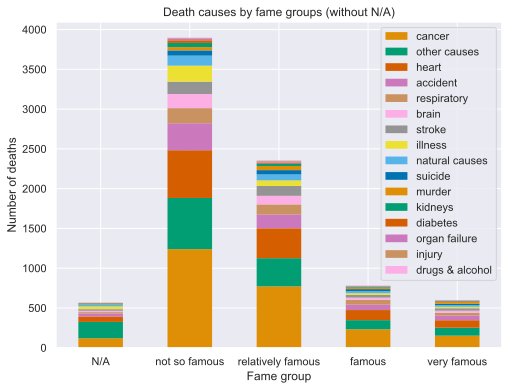

In [72]:
pd.crosstab(df.fame_group, df.cause_of_death[~df.cause_of_death.isin(["N/A"])]).reindex(fame_group_names)[cod_desc_order[1:]].plot.bar(color=my_cp[1:], stacked=True, rot=0)
plt.title("Death causes by fame groups (without N/A)")
plt.ylabel("Number of deaths")
plt.xlabel("Fame group")
plt.legend(title="")
plt.show()

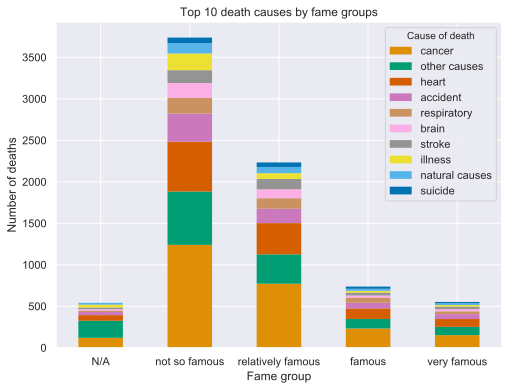

In [73]:
pd.crosstab(df.fame_group, df.cause_of_death[~df.cause_of_death.isin(["N/A"])]).reindex(fame_group_names)[cod_desc_order[1:11]].plot.bar(color=my_cp[1:], stacked=True, rot=0)
plt.title("Top 10 death causes by fame groups")
plt.ylabel("Number of deaths")
plt.xlabel("Fame group")
plt.legend(title="Cause of death")
plt.savefig("top10cod_fs", bbox_inches='tight', dpi=256)
plt.show()

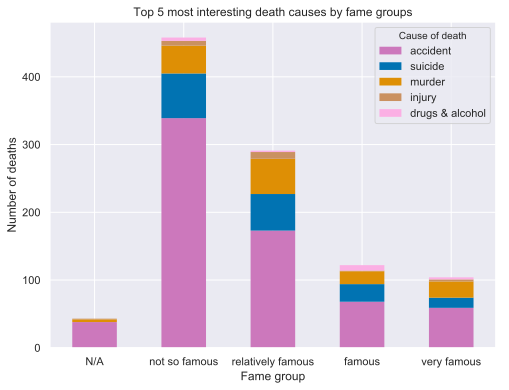

In [74]:
pd.crosstab(df.fame_group, df.cause_of_death[df.cause_of_death.isin(top_cod)]).reindex(fame_group_names)[top_cod].plot.bar(color=top_cod_cp, stacked=True, rot=0)
plt.title("Top 5 most interesting death causes by fame groups")
plt.ylabel("Number of deaths")
plt.xlabel("Fame group")
plt.legend(title="Cause of death")
plt.savefig("top5cod_fs", bbox_inches='tight', dpi=256)
plt.show()

### Анализ степени известности по времени

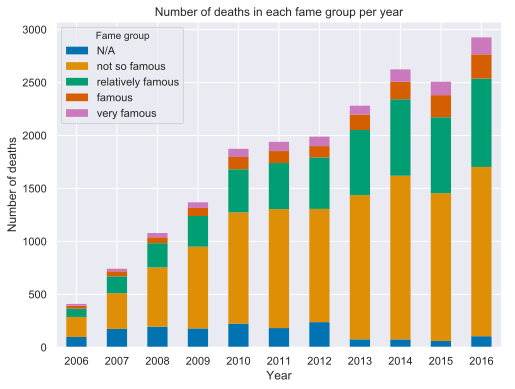

In [75]:
pd.crosstab(df.death_year, df.fame_group)[fame_group_names].plot.bar(color=my_cp, stacked=True, rot=0)
plt.title("Number of deaths in each fame group per year")
plt.ylabel("Number of deaths")
plt.xlabel("Year")
plt.legend(title="Fame group")
plt.show()

### Анализ возрастных групп по времени

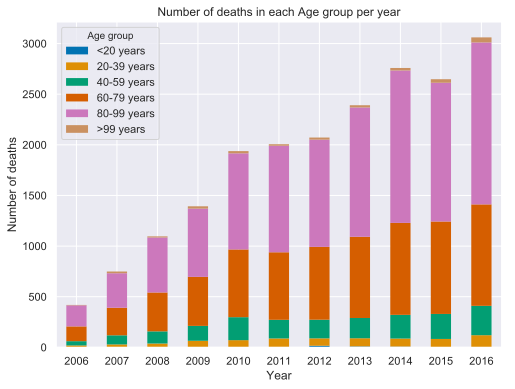

In [76]:
pd.crosstab(df.death_year, df.age_group)[age_group_names].plot.bar(color=my_cp, stacked=True, rot=0)
plt.title("Number of deaths in each Age group per year")
plt.ylabel("Number of deaths")
plt.xlabel("Year")
plt.legend(title="Age group")
plt.show()

### Анализ по национальностям

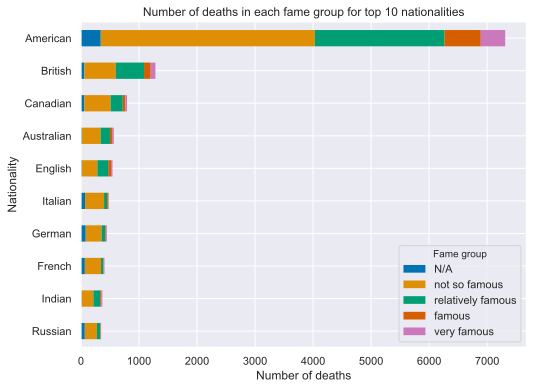

In [77]:
pd.crosstab(df.nationality, df.fame_group)[fame_group_names].reindex(df.nationality.value_counts().index)[:10][::-1].plot.barh(color=my_cp, stacked=True, rot=0)
plt.title("Number of deaths in each fame group for top 10 nationalities")
plt.xlabel("Number of deaths")
plt.ylabel("Nationality")
plt.legend(title="Fame group")
plt.show()

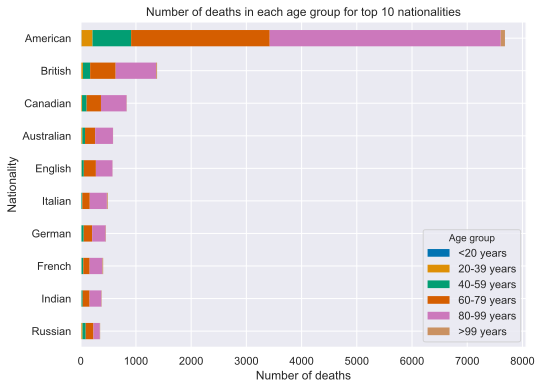

In [78]:
pd.crosstab(df.nationality, df.age_group)[age_group_names].reindex(df.nationality.value_counts().index)[:10][::-1].plot.barh(color=my_cp, stacked=True, rot=0)
plt.title("Number of deaths in each age group for top 10 nationalities")
plt.xlabel("Number of deaths")
plt.ylabel("Nationality")
plt.legend(title="Age group")
plt.show()

### Группировка по роду деятельности

In [80]:
pd.value_counts(df.famous_for)

politician                                                                      168
actor                                                                           123
footballer                                                                      105
actress                                                                          87
writer                                                                           43
author                                                                           34
singer                                                                           33
painter                                                                          30
poet                                                                             30
composer                                                                         27
football player (Washington Redskins)                                            25
baseball player (St                                                         

In [81]:
df.famous_for.value_counts().size

18604

In [82]:
# Auxillary functions
replace_ff_regexp = lambda before, after: df.famous_for.replace(".*" + before + ".*", after, inplace=True, regex=True)
show_ff = lambda name: pd.value_counts(df[df.famous_for.str.contains(name)].famous_for)

In [83]:
def check_and_replace_ff(ff_list, ff_name=None):
    for ff in ff_list:
        print("Famous for substring: ", ff)
        print(show_ff(ff))
        print()
        
    if ff_name is not None:
        for ff in ff_list:
            replace_ff_regexp(ff, ff_name)
            
    return ff_name

In [84]:
main_fames = []

In [85]:
# Group: sport
main_fames.append(check_and_replace_ff(["sportsman", "player", "footballer", "Olymp", "cricket", "athlete", "racing driver", "boxer", "cyclist"], "sport"))

Famous for substring:  sportsman
triple international sportsman (water polo rugby union and rugby league)    1
sportsman (Western Australia cricket team and Melbourne Football Club)      1
Name: famous_for, dtype: int64

Famous for substring:  player
football player (Washington Redskins)                                                25
baseball player (St                                                                  24
football player (Detroit Lions)                                                      24
baseball player (Washington Senators)                                                23
football player                                                                      23
baseball player (Detroit Tigers)                                                     22
football player (Pittsburgh Steelers)                                                21
baseball player (Brooklyn Dodgers)                                                   20
football player (Green Bay Packers)          

In [86]:
# Group: music
main_fames.append(check_and_replace_ff(["composer", "singer", "music", "sing", "guitar", "drum", "bass", "DJ", "pian"], "music"))

Famous for substring:  composer
composer                                                                                                                                     27
composer and singer                                                                                                                           2
composer and conductor                                                                                                                        2
singer and composer                                                                                                                           2
Hall of Fame record producer (The Beatles) composer arranger and engineer                                                                     1
television writer and composer (Sesame Street) Emmy award winner                                                                              1
composer and filmmaker (The Honeymoon Killers)                                                          

In [87]:
# Group: politics
main_fames.append(check_and_replace_ff(["polit", "judge", "federal", "member", "diplomat"], "politics"))

Famous for substring:  polit
politician                                                                                                        168
jurist and politician                                                                                               6
politician Prime Minister (1983ÛÒ1984 1986ÛÒ1992)                                                                 5
lawyer and politician                                                                                               3
journalist and politician                                                                                           3
politician Quebec MNA for LotbiniÌ¬re and Arthabaska (since 2003)                                                   3
newspaper executive and politician                                                                                  3
politician President (1993ÛÒ1998)                                                                                  2
politician member of the No

In [88]:
# Group: writing
main_fames.append(check_and_replace_ff(["poet", "writ", "author", "journal", "playwright"], "writing"))

Famous for substring:  poet
poet                                                                                   30
writer and poet                                                                         3
poet and writer                                                                         3
poet and playwright                                                                     2
poet critic and translator                                                              1
poet critic and professor (Tokyo Institute of Technology)                               1
poet winner of the Miguel de Cervantes Prize (2007)                                     1
poet (The Monkey's Mask)                                                                1
poet and academic Kentucky Poet Laureate (2001ÛÒ2003)                                  1
poet and children's writer                                                              1
poet and film director (A Season in Hell)                               

In [89]:
# Group: cinema
main_fames.append(check_and_replace_ff(["director", "act", "cinema", "scri", "producer", "film", "operator"], "cinema"))

Famous for substring:  director
film director                                                                                                22
theatre director                                                                                              3
actor and film director                                                                                       3
television director (Doctor Who)                                                                              2
director of Staatstheater Stuttgart (1985ÛÒ1992)                                                             1
Emmy Award-winning director (The Undersea World of Jacques Cousteau)                                          1
film director (The Debt Plac Zbawiciela)                                                                      1
college basketball coach (University of Richmond) and athletic director                                       1
film director (Il Sorpasso Profumo di donna)                            

In [90]:
# Group: art
main_fames.append(check_and_replace_ff(["art", "paint", "photo", "architect", "sculpt"], "art"))

Famous for substring:  art
artist                                                                                              11
cartoonist                                                                                           5
cartoonist (The New Yorker)                                                                          3
cartoonist (Mad)                                                                                     2
cartoonist (ThunderCats)                                                                             2
visual artist                                                                                        2
comic book artist (Archie)                                                                           2
Chicago Police Department superintendent (1987ÛÒ1992)                                               2
art historian                                                                                        2
police chief Commissioner of the Baltimore Pol

In [91]:
# Group: show
main_fames.append(check_and_replace_ff(["comed", "news", "show", "executive"], "show"))

Famous for substring:  comed
comedian                                                               6
comedian and game show host (Remote Control)                           1
Portuguese comedian                                                    1
comedian (The Real McCoy)                                              1
comedian and dancer (Stump and Stumpy DuBarry Was a Lady)              1
comedian Governor of Tokyo (1995ÛÒ1999)                               1
comedian (The Comedians)                                               1
comedian and television host (Blockbusters Card Sharks Real People)    1
comedian and game show host (Lucky Ladders)                            1
comedian (Shten)                                                     1
comedian (Brain Candy)                                                 1
comedian (The Firesign Theater)                                        1
ice skating comedian (Frick and Frack)                                 1
comedian (Skiles and H

In [92]:
# Group: business
main_fames.append(check_and_replace_ff(["busi", "entrepre", "owner"], "business"))

Famous for substring:  busi
businessman                                                                      16
businessman CEO of Total S.A. (since 2007)                                        2
businessman (Ferrero SpA)                                                         2
billionaire businessman (Mars Incorporated)                                       1
businessman owner of the Golden State Warriors (1962ÛÒ1985)                      1
American businessman (Louis Dreyfus Company)                                      1
businessman (Progressive Corporation) and philanthropist                          1
businessman Lord Lieutenant of Worcestershire (since 2001)                        1
businessman (Barratt Developments)                                                1
businessman (B&Q)                                                                 1
businessman (Ann Summers)                                                         1
businessman chairman of Books Kinokuniya        

In [93]:
# Group: science
main_fames.append(check_and_replace_ff(["geologist", "comput", "program", "game de", "scien", "math", "invent", "phys", "chem", "bio", "Nobel", "philosopher", "historian", "academic"], "science"))

Famous for substring:  geologist
geologist                                   4
petroleum geologist and MP (1974ÛÒ1979)    1
Name: famous_for, dtype: int64

Famous for substring:  comput
computer scientist                                                  3
computer engineer and scientist (MIT)                               1
computer scientist (Shellsort)                                      1
American computer scientist (AdaCore)                               1
engineer and computer scientist                                     1
computer scientist (Dadda multiplier)                               1
computer programmer (ENIAC)                                         1
co-developer of the first world computer chess champion (Kaissa)    1
computer engineer (LINC)                                            1
Name: famous_for, dtype: int64

Famous for substring:  program
computer programmer (ENIAC)                                                                 1
chairman of first undergra

In [94]:
df.famous_for.value_counts()

sport                                                                                                  5090
cinema                                                                                                 2961
politics                                                                                               2758
music                                                                                                  1474
writing                                                                                                1233
art                                                                                                     491
science                                                                                                 342
show                                                                                                    284
business                                                                                                200
N/A                         

In [95]:
df.loc[~df["famous_for"].isin(main_fames + ['N/A']), "famous_for"].value_counts()

Roman Catholic prelate                                                                                                        9
at 91"                                                                                                                        8
hurler (Cork)                                                                                                                 5
at 89"                                                                                                                        5
Austrian Sculptor                                                                                                             5
supercentenarian                                                                                                              5
racehorse                                                                                                                     4
Chairman of the Reservation (since 2011)                                                                

In [96]:
df.loc[~df["famous_for"].isin(main_fames + ['N/A']), "famous_for"] = 'other'

### Анализ по роду деятельности

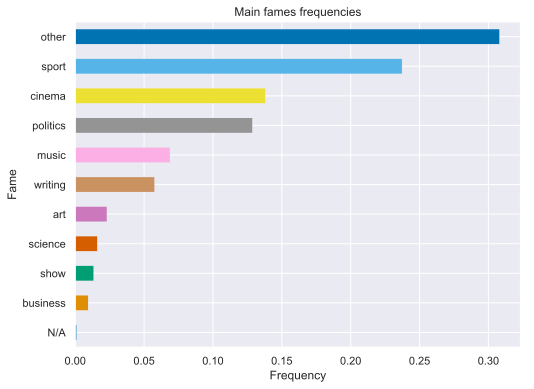

In [97]:
pd.value_counts(df.famous_for, ascending=True, normalize=True).plot.barh(color=my_cp)
plt.title('Main fames frequencies')
plt.ylabel('Fame')
plt.xlabel('Frequency')
plt.savefig("fames_bar", bbox_inches='tight', dpi=256)
plt.show()

In [98]:
# Auxillary
fames_desc_order = pd.value_counts(df.famous_for).index.tolist()

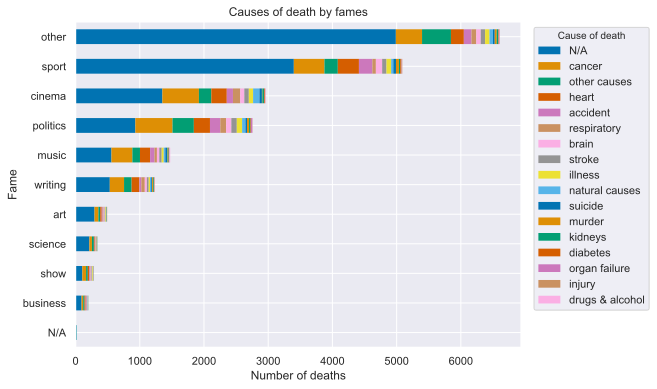

In [99]:
pd.crosstab(df.famous_for, df.cause_of_death)[cod_desc_order].reindex(fames_desc_order)[::-1].plot.barh(color=my_cp, stacked=True, rot=0)
plt.title("Causes of death by fames")
plt.xlabel("Number of deaths")
plt.ylabel("Fame")
plt.legend(title="Cause of death", loc=1, bbox_to_anchor=(1.3, 1))
plt.show()

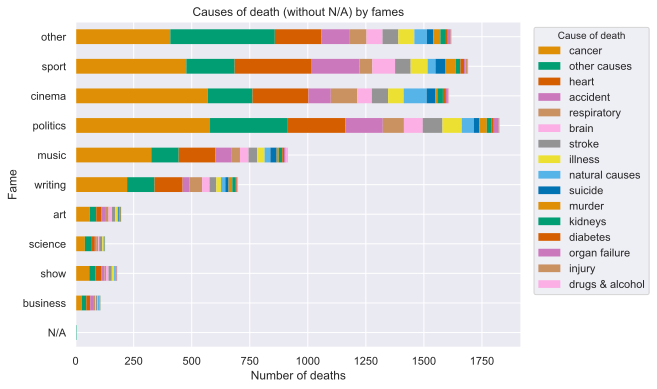

In [100]:
pd.crosstab(df.famous_for, df.cause_of_death)[cod_desc_order[1:]].reindex(fames_desc_order)[::-1].plot.barh(color=my_cp[1::], stacked=True, rot=0)
plt.title("Causes of death (without N/A) by fames")
plt.xlabel("Number of deaths")
plt.ylabel("Fame")
plt.legend(title="Cause of death", loc=1, bbox_to_anchor=(1.3, 1))
plt.show()

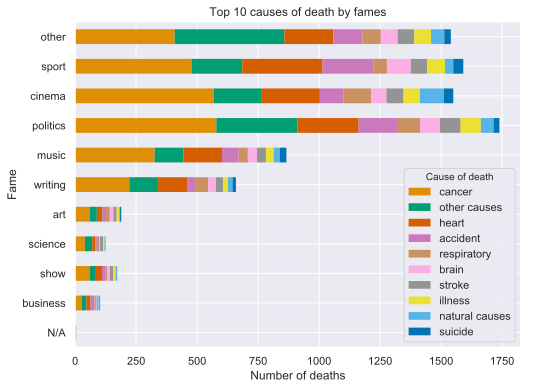

In [101]:
pd.crosstab(df.famous_for, df.cause_of_death)[cod_desc_order[1:11]].reindex(fames_desc_order)[::-1].plot.barh(color=my_cp[1::], stacked=True, rot=0)
plt.title("Top 10 causes of death by fames")
plt.xlabel("Number of deaths")
plt.ylabel("Fame")
plt.legend(title="Cause of death", loc=4)
plt.savefig("top10cod_fames", bbox_inches='tight', dpi=256)
plt.show()

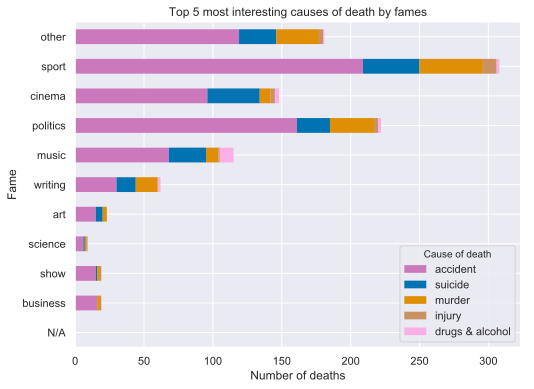

In [102]:
pd.crosstab(df.famous_for, df.cause_of_death)[top_cod].reindex(fames_desc_order)[::-1].plot.barh(color=top_cod_cp, stacked=True, rot=0)
plt.title("Top 5 most interesting causes of death by fames")
plt.xlabel("Number of deaths")
plt.ylabel("Fame")
plt.legend(title="Cause of death", loc=4)
plt.savefig("top5cod_fames", bbox_inches='tight', dpi=256)
plt.show()

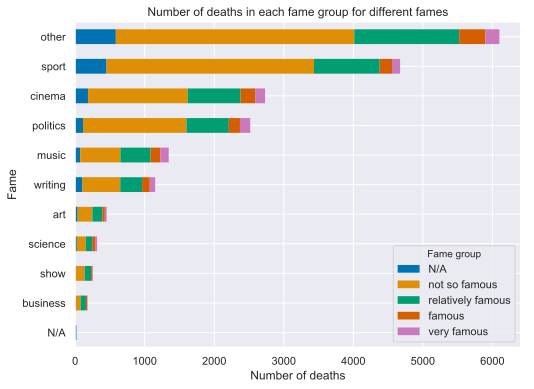

In [103]:
pd.crosstab(df.famous_for, df.fame_group)[fame_group_names].reindex(fames_desc_order)[::-1].plot.barh(color=my_cp, stacked=True, rot=0)
plt.title("Number of deaths in each fame group for different fames")
plt.xlabel("Number of deaths")
plt.ylabel("Fame")
plt.legend(title="Fame group")
plt.show()

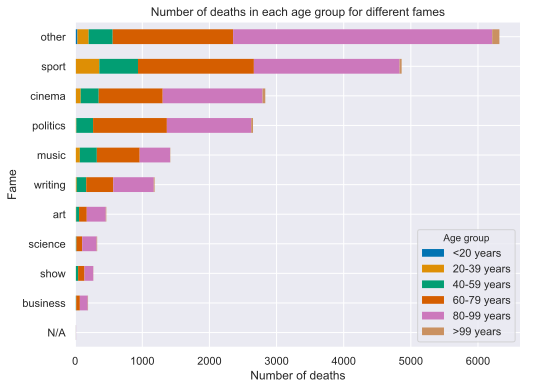

In [104]:
pd.crosstab(df.famous_for, df.age_group)[age_group_names].reindex(fames_desc_order)[::-1].plot.barh(color=my_cp, stacked=True, rot=0)
plt.title("Number of deaths in each age group for different fames")
plt.xlabel("Number of deaths")
plt.ylabel("Fame")
plt.legend(title="Age group")
plt.show()

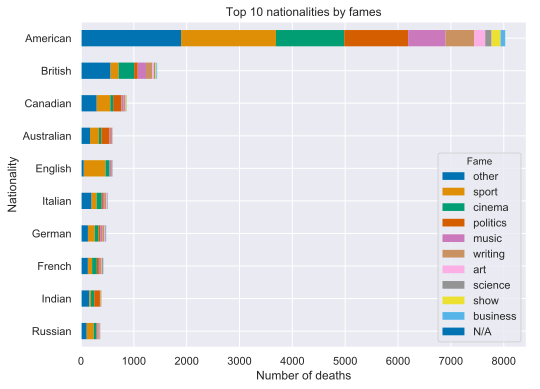

In [105]:
pd.crosstab(df.nationality, df.famous_for)[fames_desc_order].reindex(df.nationality.value_counts().index)[:10][::-1].plot.barh(color=my_cp, stacked=True, rot=0)
plt.title("Top 10 nationalities by fames")
plt.xlabel("Number of deaths")
plt.ylabel("Nationality")
plt.legend(title="Fame")
plt.show()